In [1]:
%pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import scipy.io
mat = scipy.io.loadmat('../OT data 80 um/ot_int_data.mat', simplify_cells=True)

In [24]:
import numpy as np
import pandas as pd
df = pd.read_table('../OT data 80 um/matlabexport.tsv')
print(np.shape(mat['patches']))
print(list(mat.keys()))
data = mat['patches']
example = data[0]
print(list(example.keys()))

(38097,)
['__header__', '__version__', '__globals__', 'patches', '__function_workspace__']
['img', 'id', 'layer', 'label', 'defect_perc']


(array([6654., 6800., 5823., 4900., 4900., 1820., 1800., 1800., 1800.,
        1800.]),
 array([  0. ,  99.9, 199.8, 299.7, 399.6, 499.5, 599.4, 699.3, 799.2,
        899.1, 999. ]),
 <BarContainer object of 10 artists>)

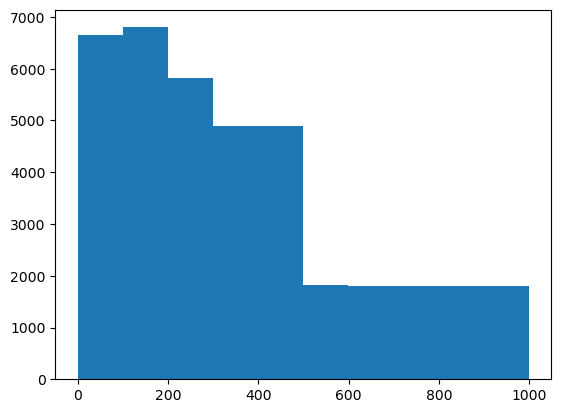

In [22]:
plt.hist(df['layer'])
# Ok, I could make it work but this seems tricky. I'd rather stick with Zhuoer's data for now.

In [3]:
import pandas as pd
df = pd.read_table('../OT data 80 um/matlabexport.tsv')
oki = df.drop(columns=['type', 'ignore', 'porosity']).groupby(by='id')

In [4]:
res = oki.describe()

In [5]:
res

layer                                                      
                count   mean         std  min     25%    50%     75%    max
id                                                                         
'B10_sp1'       998.0  500.5  288.242086  2.0  251.25  500.5  749.75  999.0
'B10_sp10'      998.0  500.5  288.242086  2.0  251.25  500.5  749.75  999.0
'B10_sp11'      998.0  500.5  288.242086  2.0  251.25  500.5  749.75  999.0
'B10_sp12'      998.0  500.5  288.242086  2.0  251.25  500.5  749.75  999.0
'B10_sp13'      998.0  500.5  288.242086  2.0  251.25  500.5  749.75  999.0
...               ...    ...         ...  ...     ...    ...     ...    ...
'B17_80mi_sp2'  250.0  250.0  144.625954  1.0  125.50  250.0  374.50  499.0
'B17_80mi_sp3'  250.0  250.0  144.625954  1.0  125.50  250.0  374.50  499.0
'B17_80mi_sp4'  250.0  250.0  144.625954  1.0  125.50  250.0  374.50  499.0
'B17_80mi_sp5'  250.0  250.0  144.625954  1.0  125.50  250.0  374.50  499.0
'B17_80mi_sp6'  250.0  250.0  144.625954  1.0  125.50  250.0  374.50  499.0

[71 rows x 8 columns]

In [24]:
np.read
el = data[0]['label']

ids = [data[i]['id'] for i in range(len(data))]
idset = set(ids)
ids = list(idset)
ids.sort()
print(len(ids))

71
B10_sp1
B10_sp10
B10_sp11
B10_sp12
B10_sp13
B10_sp14
B10_sp15
B10_sp16
B10_sp17
B10_sp18
B10_sp2
B10_sp3
B10_sp4
B10_sp5
B10_sp6
B10_sp7
B10_sp8
B10_sp9
B11_sp1
B11_sp10
B11_sp11
B11_sp12
B11_sp13
B11_sp14
B11_sp15
B11_sp16
B11_sp17
B11_sp18
B11_sp2
B11_sp3
B11_sp4
B11_sp5
B11_sp6
B11_sp7
B11_sp8
B11_sp9
B14_sp1
B14_sp10
B14_sp11
B14_sp12
B14_sp13
B14_sp14
B14_sp15
B14_sp16
B14_sp17
B14_sp18
B14_sp2
B14_sp3
B14_sp4
B14_sp5
B14_sp6
B14_sp7
B14_sp8
B14_sp9
B16_20mi_sp1
B16_20mi_sp2
B16_20mi_sp3
B16_20mi_sp4
B16_20mi_sp5
B17_40mi_sp1
B17_40mi_sp2
B17_40mi_sp3
B17_40mi_sp4
B17_40mi_sp5
B17_40mi_sp6
B17_80mi_sp1
B17_80mi_sp2
B17_80mi_sp3
B17_80mi_sp4
B17_80mi_sp5
B17_80mi_sp6


Text(0.5, 1.0, '0.35, B14_sp13')

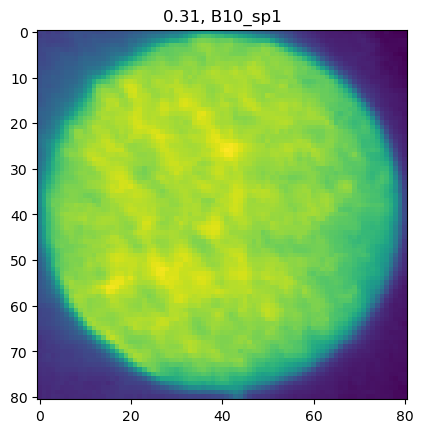

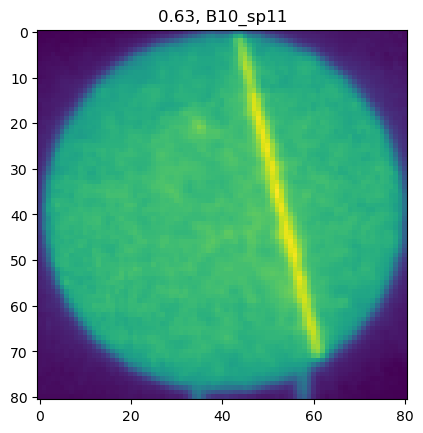

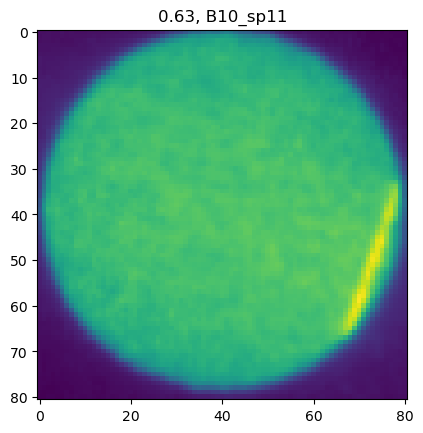

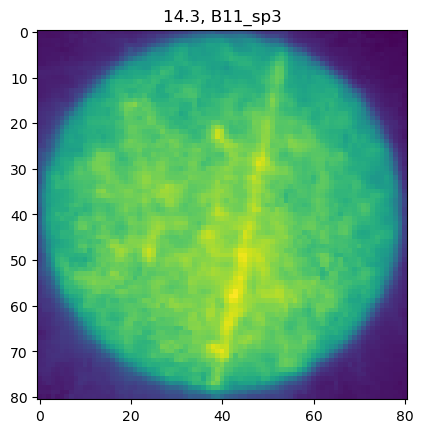

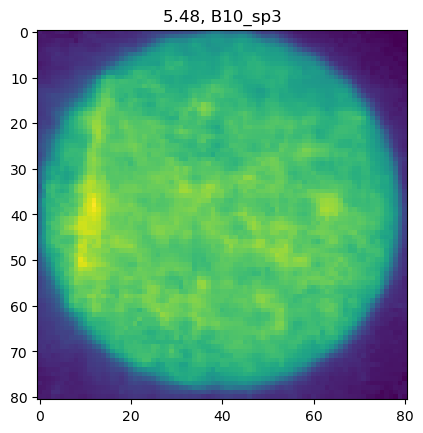

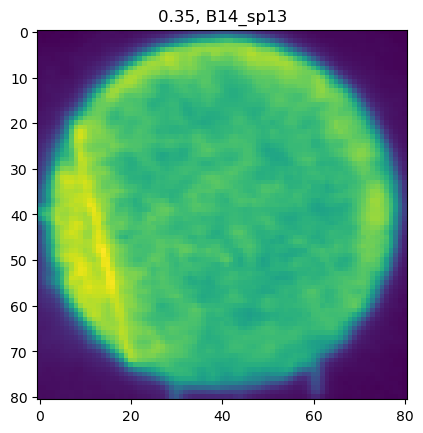

In [11]:
import matplotlib.pyplot as plt

plt.imshow(data[0]['img'])
plt.title(str(data[0]['defect_perc']) + ", " + str(data[0]['id']))
plt.figure()
plt.imshow(data[1000]['img'])
plt.title(str(data[1000]['defect_perc']) + ", " + str(data[1000]['id']))
plt.figure()
plt.imshow(data[10000]['img'])
plt.title(str(data[10000]['defect_perc']) + ", " + str(data[10000]['id']))
plt.figure()
plt.imshow(data[20000]['img'])
plt.title(str(data[20000]['defect_perc']) + ", " + str(data[20000]['id']))
plt.figure()
plt.imshow(data[15032]['img'])
plt.title(str(data[15032]['defect_perc']) + ", " + str(data[15032]['id']))
plt.figure()
plt.imshow(data[30000]['img'])
plt.title(str(data[30000]['defect_perc']) + ", " + str(data[30000]['id']))

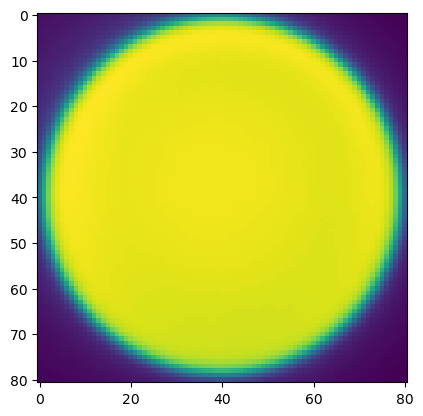

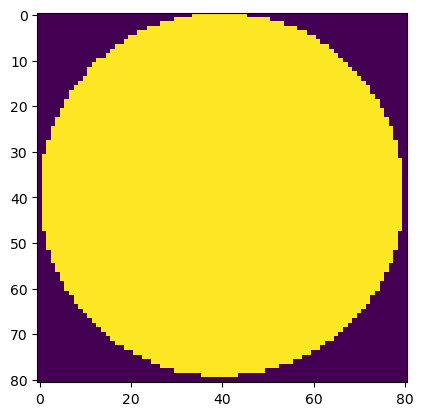

In [16]:
justimg = [data[i]['img'] for i in range(len(data))]
aggregate = np.sum(justimg, axis=(0))
plt.figure()
plt.imshow(aggregate)
limit = np.percentile(aggregate, 24)
plt.figure()
plt.imshow(aggregate > limit)

In [ ]:
# objects är en 3d numpy array
def makeMask(objects, emptyRatio):
    aggregate = np.sum(objects, axis=(0,1))
    limit = np.percentile(aggregate, emptyRatio)
    mask = aggregate >= limit
    return mask


In [ ]:
describe()